What's the impact on freedom (movement, choice) on happiness.

# Importing and cleaning Data

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', 140)

## World Happiness Report import

World Happiness Report includes serveral factors in order to calculate the happiness score for each country. 
As the question focus on to the freedom of movement, 
we will use the data relating to the freedom to make life choice (cfr. below for the description)

In [74]:
hr_2015 = pd.read_csv('2015.csv')
hr_2016 = pd.read_csv('2016.csv')
hr_2017 = pd.read_csv('2017.csv')

In [75]:
result = [] 
for value in hr_2015["Country"]: 
        result.append("2015") 
hr_2015["Year"] = result  


In [76]:
result = [] 
for value in hr_2016["Country"]: 
        result.append("2016") 
hr_2016["Year"] = result  


In [77]:
result = [] 
for value in hr_2017["Country"]: 
        result.append("2017") 
hr_2017["Year"] = result  
hr_2017

,Country,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,2017


In [78]:
#Data types are correct.

hr_2017.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
Dystopia Residual                float64
Year                              object
dtype: object

In [79]:
# There isn't NaN values in the dataset.

hr_2017.isnull().values.any()

False

In [80]:
hr = pd.concat([hr_2017,hr_2016,hr_2015])
hr.dtypes
hr

,Country,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year,Region,Standard Error
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017,NaN,NaN
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017,NaN,NaN
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017,NaN,NaN
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017,NaN,NaN
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,NaN,NaN,0.222080,0.773700,0.428640,0.592010,0.226280,0.551910,0.670420,2015,Sub-Saharan Africa,0.03464
154,Benin,155,3.340,NaN,NaN,0.286650,0.353860,0.319100,0.484500,0.182600,0.080100,1.633280,2015,Sub-Saharan Africa,0.03656
155,Syria,156,3.006,NaN,NaN,0.663200,0.474890,0.721930,0.156840,0.471790,0.189060,0.328580,2015,Middle East and Northern Africa,0.05015
156,Burundi,157,2.905,NaN,NaN,0.015300,0.415870,0.223960,0.118500,0.197270,0.100620,1.833020,2015,Sub-Saharan Africa,0.08658


In [81]:
convert_dict = {'Year':object
               } 
  
hr = hr.astype(convert_dict) 
print(hr.dtypes) 

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
Dystopia Residual                float64
Year                              object
Region                            object
Standard Error                   float64
dtype: object


Human Freedom report import

In [82]:
hfi = pd.read_csv('human-freedom-index-2019.csv')

In [83]:
hfi.sort_values(['Year'], ascending = False)


,Year,ISO_code,Country,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,pf_association_prof_operate,pf_association_prof,pf_association_sport_establish,pf_association_sport_operate,pf_association_sport,pf_association,pf_expression_killed,pf_expression_jailed,pf_expression_influence,pf_expression_control,pf_expression_cable,pf_expression_newspapers,pf_expression_internet,pf_expression,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_transfers,ef_government_enterprises,ef_government_tax_income,ef_government_tax_payroll,ef_government_tax,ef_government_soa,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_restrictions,ef_legal_police,ef_legal_crime,ef_legal_gender,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2017,ALB,Albania,Eastern Europe,7.84,38,1,6.7,4.5,4.7,5.3,9.1,10,10,10,10,10,10,10,-,-,7.5,8.8,9.3,10,10,10,10,-,-,10,9.6,8,9.2,10,10,-,-,10,-,-,10,-,-,10,10,10,10,5,5.3,10,10,10,8.6,0,10,10,10,7.5,5.8,8.01,46,8.1,7.3,8,9,7,8,6.2,7.5,2.5,3.1,4.6,8.3,4.2,4.4,6.6,6.8,6.2,1,5.1,9.3,9.7,9.6,10,9.6,9.6,9.3,8.1,9,6,9.4,7.7,10,6.3,5.4,8.3,6.7,8.3,10,9.1,10,9.7,5.6,5.4,6.4,8,6.3,10,6.9,6.3,6.7,9.7,4.1,6,7.2,6.7,7.8,7.67,30
123,2017,ROU,Romania,Eastern Europe,8.11,30,1,6.8,6.5,5.7,6.3,9.4,10,10,10,10,10,10,10,-,-,10,10,9.8,10,10,10,10,-,-,10,7.9,5.7,7.9,10,10,-,-,10,-,-,10,-,-,10,10,10,10,7,6,10,10,10,9,7,10,10,10,7.5,8.2,8.54,32,6,6.9,8,10,4,7,7,7,5.1,3.5,6,8.3,5,5,9.3,6,6.8,1,6.1,8.2,9.6,9.7,10,9.4,9,9,6.7,8.2,6,10,8,10,6.3,8.5,7.7,7.5,8.4,8,8.6,10,8.9,3.9,5.6,7.1,8,10,10,7.4,2.9,6.7,8.9,3.5,6.7,8.2,6.1,7.5,7.68,28
104,2017,NAM,Namibia,Sub-Saharan Africa,6.75,87,3,-,-,-,5.6,3.1,10,10,7.5,10,10,9.5,10,-,-,7.5,8.8,7.1,10,10,2.5,7.5,-,-,7.5,9.8,8.9,8.7,7.5,7.5,-,-,7.5,-,-,7.5,-,-,5,7,10,10,7,6.8,-,-,7.5,8.3,7,0,10,5,7.5,6.5,6.97,80,4,8.7,4,6,6,6,5.8,5.7,7.1,5.8,7,10,8.3,4.8,4.6,5.5,4.8,1,6.4,8.6,8.5,8.8,0,6.5,4.5,8.5,5.7,6.2,5.7,5.3,5.5,10,6.2,0.8,5.8,4.2,6.5,10,6.4,10,8.8,10,4.5,6.3,10,8.3,10,8.2,4.8,4,7.8,4.2,8.3,6.6,6,7.7,6.53,106
105,2017,NPL,Nepal,South Asia,6.51,107,3,3.4,4.7,4.3,4.3,9.1,10,10,7.5,10,9.4,9.4,10,-,-,7.5,8.8,9.1,10,5,10,8.3,-,-,2.5,7.6,5.5,5.2,7.5,7.5,-,-,5,-,-,2.5,-,-,2.5,5,10,10,4.7,4.8,5,7.5,5,6.7,10,10,10,10,0,6.7,6.53,98,8,9.2,7,7,7,7,4.9,7.2,4.5,3.6

Human Freedom report cleaning

In [84]:
# There isn't NaN values in the dataset.
hfi.isnull().values.any()

False

In [85]:
#The Human feedom index overview 76 indicators in order to calculate the human freedom score. Since the question 
#particularily relates to the freedom of movement the focus is on the following columns:
# pf_movement_domestic, pf_movement_foreign, pf_movement_women, pf_movement(total).

hfi_select = hfi[['Year','Country', 'region', 'hf_score','hf_rank', 
                       'hf_quartile', 'pf_movement_domestic', 'pf_movement_foreign', 
                       'pf_movement_women', 'pf_movement']]


hfi_select = hfi_select.loc[hfi['Year']>=2015]

hfi_select

,Year,Country,region,hf_score,hf_rank,hf_quartile,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement
0,2017,Albania,Eastern Europe,7.84,38,1,10,10,10,10
1,2017,Algeria,Middle East & North Africa,4.99,155,4,10,5,2.5,5.8
2,2017,Angola,Sub-Saharan Africa,5.4,151,4,5,5,10,6.7
3,2017,Argentina,Latin America & the Caribbean,6.86,77,2,10,10,10,10
4,2017,Armenia,Caucasus & Central Asia,7.42,54,2,10,5,10,8.3
...,...,...,...,...,...,...,...,...,...,...
481,2015,Venezuela,Latin America & the Caribbean,4.08,158,4,10,5,10,8.3
482,2015,Vietnam,South Asia,6.06,125,4,0,5,5,3.3
483,2015,"Yemen, Rep.",Middle East & North Africa,4.21,157,4,5,0,0,1.7
484,2015,Zambia,Sub-Saharan Africa,6.51,105,3,0,10,5,5


In [86]:
hfi_select.loc[hfi_select['hf_score'] == '-']

,Year,Country,region,hf_score,hf_rank,hf_quartile,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement
336,2015,Belarus,Eastern Europe,-,-,-,-,-,-,-
394,2015,Iraq,Middle East & North Africa,-,-,-,-,-,-,-
461,2015,Sudan,Sub-Saharan Africa,-,-,-,-,-,-,-


In [87]:
# The fact there is a lack of clarity for Belarus, Iraq and Sudan will be interpreted as a 
# risk for the establishement of a freedom of movement within these countries, thus a score of 0 will be attribted.
hfi_select.replace('-',0,inplace=True)

In [88]:
hfi_select

,Year,Country,region,hf_score,hf_rank,hf_quartile,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement
0,2017,Albania,Eastern Europe,7.84,38,1,10,10,10,10
1,2017,Algeria,Middle East & North Africa,4.99,155,4,10,5,2.5,5.8
2,2017,Angola,Sub-Saharan Africa,5.4,151,4,5,5,10,6.7
3,2017,Argentina,Latin America & the Caribbean,6.86,77,2,10,10,10,10
4,2017,Armenia,Caucasus & Central Asia,7.42,54,2,10,5,10,8.3
...,...,...,...,...,...,...,...,...,...,...
481,2015,Venezuela,Latin America & the Caribbean,4.08,158,4,10,5,10,8.3
482,2015,Vietnam,South Asia,6.06,125,4,0,5,5,3.3
483,2015,"Yemen, Rep.",Middle East & North Africa,4.21,157,4,5,0,0,1.7
484,2015,Zambia,Sub-Saharan Africa,6.51,105,3,0,10,5,5


In [89]:
#Data Types were not correct, modification into float or int types depending on the data.

convert_dict = {'Year':object, 'hf_score':float, 'hf_rank':int,'hf_quartile':int
                ,'pf_movement_domestic':int,'pf_movement_foreign':int,'pf_movement_women':float,
    'pf_movement':float
               } 
  
hfi_select = hfi_select.astype(convert_dict) 
print(hfi_select.dtypes) 


Year                     object
Country                  object
region                   object
hf_score                float64
hf_rank                   int64
hf_quartile               int64
pf_movement_domestic      int64
pf_movement_foreign       int64
pf_movement_women       float64
pf_movement             float64
dtype: object


 Creating a datas et including the 3 freedom scores per country

In [90]:
hr_2017 = hr_2017.sort_values(['Country'])

In [91]:
hfi2017 = hfi_select.loc[hfi_select['Year'] == 2017].sort_values(['Country'])

In [92]:
hfi2017_s = hfi2017[['Country', 'pf_movement_domestic','pf_movement_foreign']]

hfi2017_s

,Country,pf_movement_domestic,pf_movement_foreign
0,Albania,10,10
1,Algeria,10,5
2,Angola,5,5
3,Argentina,10,10
4,Armenia,10,5
...,...,...,...
157,Venezuela,0,10
158,Vietnam,0,5
159,"Yemen, Rep.",0,5
160,Zambia,0,10


In [93]:
# FINAL DATA for 2017

freedom_2017 = hr_2017.merge(hfi2017_s, how='left', on='Country')

In [94]:
hfi2016 = hfi_select.loc[hfi_select['Year'] == 2016].sort_values(['Country'])

hfi2016_s = hfi2017[['Country', 'pf_movement_domestic','pf_movement_foreign']]

In [95]:
# FINAL DATA for 2016

freedom_2016 = hr_2016.merge(hfi2016_s, how='left', on='Country')
freedom_2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,pf_movement_domestic,pf_movement_foreign
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016,10.0,10.0
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016,10.0,10.0
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,10.0,10.0
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016,10.0,10.0
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016,5.0,10.0
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016,NaN,NaN
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016,5.0,10.0
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016,0.0,0.0


In [96]:
hfi2015 = hfi_select.loc[hfi_select['Year'] == 2015].sort_values(['Country'])

In [97]:
hfi2015_s = hfi2015[['Country', 'pf_movement_domestic','pf_movement_foreign']]


In [98]:
# FINAL DATA for 2016

freedom_2015 = hr_2015.merge(hfi2015_s, how='left', on='Country')
freedom_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,pf_movement_domestic,pf_movement_foreign
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,10.0,10.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,10.0,10.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,10.0,10.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,10.0,10.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015,10.0,5.0
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015,5.0,10.0
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015,0.0,0.0
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015,0.0,0.0


In [99]:
country_del = freedom_2017.isna().sum()
country_del


Country                           0
Happiness Rank                    0
Happiness Score                   0
Lower Confidence Interval         0
Upper Confidence Interval         0
Economy (GDP per Capita)          0
Family                            0
Health (Life Expectancy)          0
Freedom                           0
Generosity                        0
Trust (Government Corruption)     0
Dystopia Residual                 0
Year                              0
pf_movement_domestic             21
pf_movement_foreign              21
dtype: int64

# Correlation between the happiness score per country and freedom indexes 

In [100]:
freedom_2017= freedom_2017.dropna()

In [101]:
freedom_2017.loc[freedom_2017['Country']=='Belgium']

,Country,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year,pf_movement_domestic,pf_movement_foreign
12,Belgium,17,6.891,6.955821,6.826179,1.463781,1.462313,0.818092,0.539771,0.231503,0.251343,2.12421,2017,10.0,10.0


In [102]:
#Now, we have a clean DS for 2017, we will anaylize, per country the hr score on a graph, then 
# the %relation between the HR and each freedom index.

freedom_2017.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,pf_movement_domestic,pf_movement_foreign
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,76.000000,5.408918,5.507718,5.310118,1.007292,1.203230,0.562577,0.414733,0.247193,0.124898,1.848955,8.022388,7.537313
std,45.337332,1.138540,1.126097,1.152208,0.407745,0.267806,0.227110,0.150019,0.139986,0.104139,0.502756,3.523213,3.454662
min,1.000000,2.905000,3.074690,2.735310,0.091623,0.396103,0.000000,0.000000,0.000000,0.000000,0.377914,0.000000,0.000000
25%,36.250000,4.537500,4.627970,4.379207,0.729296,1.068297,0.403877,0.320115,0.153590,0.057629,1.587952,5.000000,5.000000
50%,75.500000,5.317500,5.425725,5.225156,1.072805,1.258944,0.617364,0.443255,0.229811,0.091646,1.805517,10.000000,10.000000
75%,114.750000,6.353750,6.450057,6.228256,1.315027,1.419041,0.724903,0.520332,0.326438,0.153411,2.175726,10.000000,10.000000
max,154.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.635423,0.838075,0.464308,2.898639,10.000000,10.000000


<AxesSubplot:>

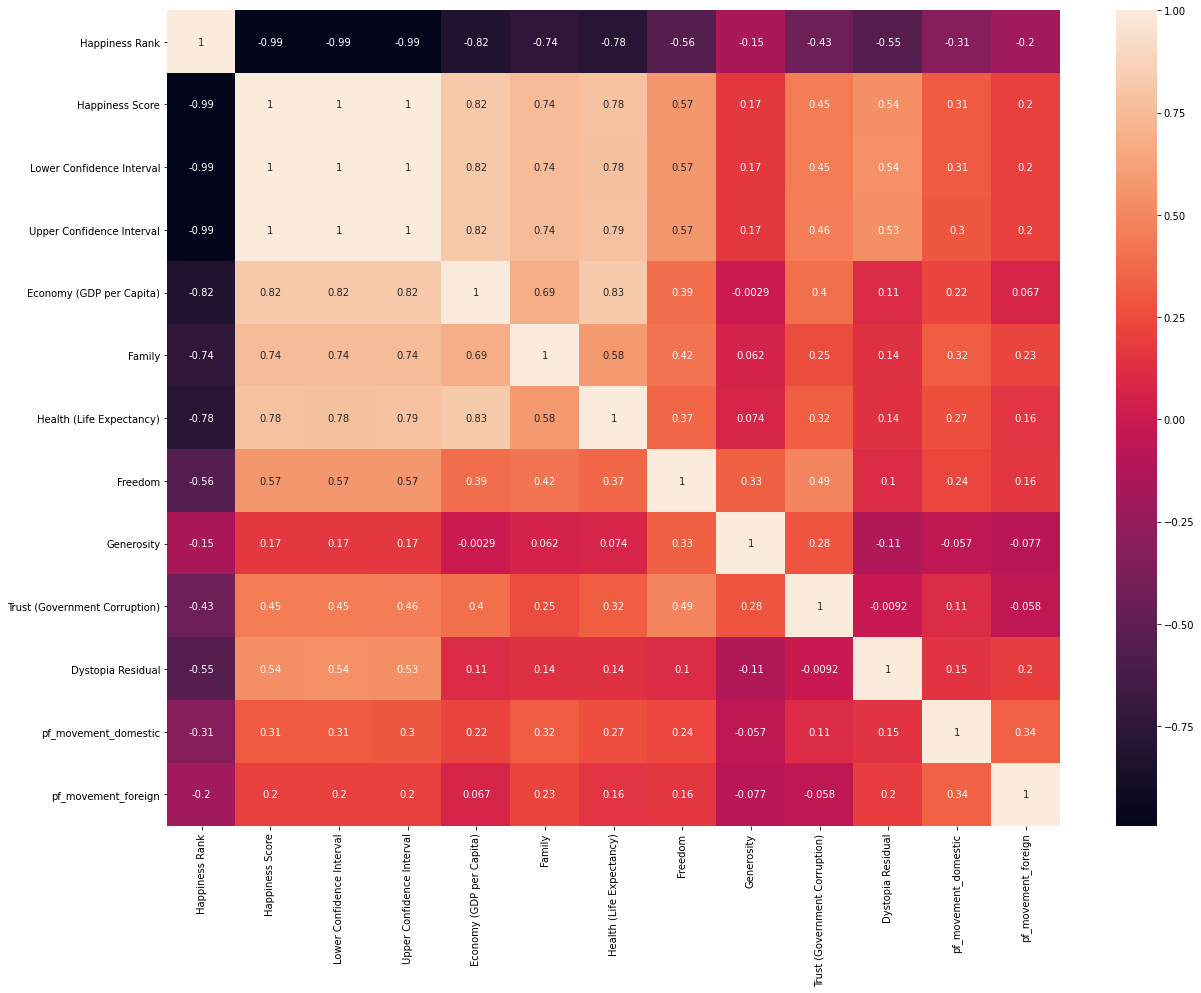

In [103]:
plt.subplots(figsize=(20,15))
sns.heatmap(freedom_2017.corr(), annot =True)

#Freedom, freedom of movement, domestic and foreign.

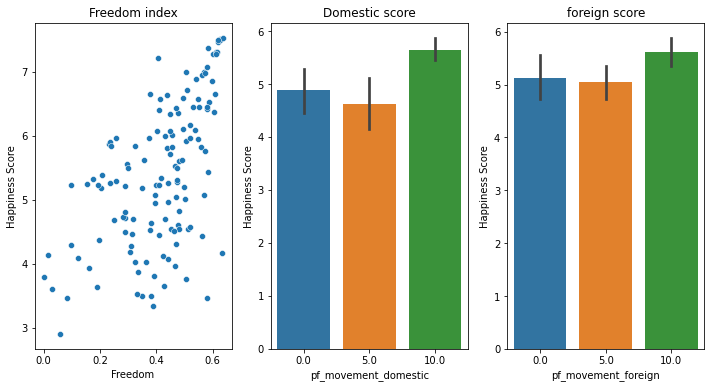

In [104]:
#Happiness score and the global Freedom index

sns.color_palette("pastel")

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,6))
ax1.set_title('Freedom index')
ax1 = sns.scatterplot(x='Freedom',y='Happiness Score', data=freedom_2017, ax=ax1)
ax2.set_title('Domestic score')
ax2 = sns.barplot(x="pf_movement_domestic", y="Happiness Score", data=freedom_2017,ax=ax2)

ax3.set_title('foreign score')
ax3 = sns.barplot(x="pf_movement_foreign", y="Happiness Score", data=freedom_2017, ax=ax3)



plt.show()


In [105]:
#effect on happiness is the same or not
#the freer they are in mov, the happier but loking at the means, no. 
#the result could be the effect of a sampling bias is that the case? 
#ttest ind 
#dependent sample: effect of the domestic and foreign for one country.

#The Independent Samples t Test compares the means of two independent groups in order to determine whether 
#there is statistical evidence that the associated population means are significantly different. 

from scipy.stats import ttest_ind

ttest_ind(freedom_2017.pf_movement_domestic, freedom_2017['Happiness Score'], equal_var=False)


#With 95% confidence interval, since the p-value is close to 0, Ho should be rejected, thus there is 
#a difference between associated population means are significantly different.


#Ho: no impact on happiness score.
#lin reg: coef+p-value
#get the relation and test whether there is a relation.

Ttest_indResult(statistic=8.170756696348205, pvalue=8.645506926697605e-14)

In [139]:
#Ho: Domestic movement index has no impact on happiness score.
#H1: Domestic movement index has an impact on happiness score.

from scipy import stats
X = freedom_2017['pf_movement_domestic']
Y = freedom_2017['Happiness Score']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print(p_value)
print(slope)


0.00030972660295409233
0.09918226238185644


### Freedom index & Happiness score relation for 2017

The freedom data represents the Freedom to make life choices score per country. It is the national average of binary 
responses to the question “Are you satisfied or dissatisfiedwith your freedom to choose what you do
with your life?" The most the score is hihgh, freer the inhabitants of a country are.

There is a trends showing that, the most the freedom score is high, the more the Happiness score 
will be high too.


#AVG, lack of clarity 
Measure for movement

### Foreign/domestic movement & Happiness score relation for 2017

The pf_freedom_foreign and pf_freedom_domestic data indicates respectively the score representing the possibility to freely moove within a country or without.
0 representing the least free countries and 10, the most free countries.

The result here is intriguing because we see that countries with a score of 0 tends to have a 
happiness score of higher than countries with a score of 5. This goes against the primary hypothesis that 
freedom (and in this case domestic freedom) is a key element to global happiness. 
Although we see that the countries with a domestic or foreign freedom score of 10 tends to have a high happiness score.

From the data it appears from the analysis that the freedom to make life choice index has a bigger correlation with the happiness than the freedom of movement. 


# Futher Analysis: Freedom index & Happiness.Score relation from 2015 to 2017

In [106]:
hr.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
Dystopia Residual                float64
Year                              object
Region                            object
Standard Error                   float64
dtype: object

In [107]:
#world happiness report from 2015-2017
hr.sort_values(['Freedom'],ascending =False)

,Country,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year,Region,Standard Error
3,Norway,4,7.522,NaN,NaN,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2.465310,2015,Western Europe,0.03880
0,Switzerland,1,7.587,NaN,NaN,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2.517380,2015,Western Europe,0.03411
144,Cambodia,145,3.819,NaN,NaN,0.460380,0.627360,0.611140,0.662460,0.403590,0.072470,0.981950,2015,Southeastern Asia,0.05069
7,Sweden,8,7.364,NaN,NaN,1.331710,1.289070,0.910870,0.659800,0.362620,0.438440,2.371190,2015,Western Europe,0.03157
46,Uzbekistan,47,5.971,6.065538,5.876463,0.786441,1.548969,0.498273,0.658249,0.415984,0.246528,1.816914,2017,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Sudan,130,4.139,4.345747,3.932253,0.659517,1.214009,0.290921,0.014996,0.182317,0.089848,1.687066,2017,NaN,NaN
140,Angola,141,3.866,3.753000,3.979000,0.847310,0.663660,0.049910,0.005890,0.120710,0.084340,2.094590,2016,Sub-Saharan Africa,NaN
139,Angola,140,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482,2017,NaN,NaN
111,Iraq,112,4.677,NaN,NaN,0.985490,0.818890,0.602370,0.000000,0.179220,0.137880,1.953350,2015,Middle East and Northern Africa,0.05232


In [114]:
hr.loc[hr['Freedom'] < 0.216, 'freedom_categ'] = 'Low'
hr.loc[hr['Freedom'] >= 0.216, 'freedom_categ'] = 'Medium'
hr.loc[hr['Freedom'] >= 0.432, 'freedom_categ'] = 'High'


In [115]:
hr.loc[hr['Happiness Score'] < 2.5, 'happiness_categ'] = 'Low'
hr.loc[hr['Happiness Score'] >= 2.5, 'happiness_categ'] = 'Medium'
hr.loc[hr['Happiness Score'] >= 5, 'happiness_categ'] = 'High'

In [116]:
hr

,Country,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year,Region,Standard Error,freedom_categ,happiness_categ
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017,NaN,NaN,High,High
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017,NaN,NaN,High,High
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017,NaN,NaN,High,High
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017,NaN,NaN,High,High
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017,NaN,NaN,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,NaN,NaN,0.222080,0.773700,0.428640,0.592010,0.226280,0.551910,0.670420,2015,Sub-Saharan Africa,0.03464,High,Medium
154,Benin,155,3.340,NaN,NaN,0.286650,0.353860,0.319100,0.484500,0.182600,0.080100,1.633280,2015,Sub-Saharan Africa,0.03656,High,Medium
155,Syria,156,3.006,NaN,NaN,0.663200,0.474890,0.721930,0.156840,0.471790,0.189060,0.328580,2015,Middle East and Northern Africa,0.05015,Low,Medium
156,Burundi,157,2.905,NaN,NaN,0.015300,0.415870,0.223960,0.118500,0.197270,0.100620,1.833020,2015,Sub-Saharan Africa,0.08658,Low,Medium


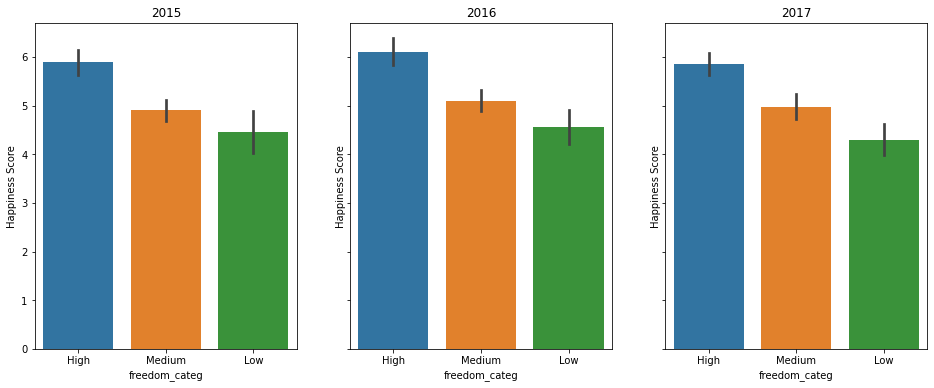

In [128]:


fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,6), sharey = True)
ax1.set_title('2015')
ax1 = sns.barplot(y= hr['Happiness Score'].loc[hr['Year']=='2015'],x=hr['freedom_categ'].loc[hr['Year']=='2015'] ,data=hr,ax = ax1)
ax2.set_title('2016')
ax2 = sns.barplot(y= hr['Happiness Score'].loc[hr['Year']=='2016'],x=hr['freedom_categ'].loc[hr['Year']=='2016'] 
                  ,data=hr,ax=ax2)
ax3.set_title('2017')
ax3 = sns.barplot(y= hr['Happiness Score'].loc[hr['Year']=='2017'],x=hr['freedom_categ'].loc[hr['Year']=='2017'] ,
                  data=hr, ax = ax3)


From the first analysis, we saw that the Freedom index has the highest correlation with the Happiness score. It thus makes sense to analyses this further. We see that the trends are very similar for these 3 years, except for 2016 where the countries included in the Highest freedom category otbained a better score. 

#Low medium high and relates to the scatter plot

#fix the range (y lim ?)

In [58]:
hr

,Country,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year,Region,Standard Error,happiness_categ
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017,NaN,NaN,High
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017,NaN,NaN,High
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017,NaN,NaN,High
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017,NaN,NaN,High
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017,NaN,NaN,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,NaN,NaN,0.222080,0.773700,0.428640,0.592010,0.226280,0.551910,0.670420,2015,Sub-Saharan Africa,0.03464,Medium
154,Benin,155,3.340,NaN,NaN,0.286650,0.353860,0.319100,0.484500,0.182600,0.080100,1.633280,2015,Sub-Saharan Africa,0.03656,Medium
155,Syria,156,3.006,NaN,NaN,0.663200,0.474890,0.721930,0.156840,0.471790,0.189060,0.328580,2015,Middle East and Northern Africa,0.05015,Medium
156,Burundi,157,2.905,NaN,NaN,0.015300,0.415870,0.223960,0.118500,0.197270,0.100620,1.833020,2015,Sub-Saharan Africa,0.08658,Medium


# Further analysis per countries

## Countries with a "low" Freedom score 

In [129]:
print(list(hr['Country'].loc[(hr['freedom_categ'] == 'Low')&(hr['Year'] == '2017')]))


print(hr['Country'].loc[(hr['freedom_categ'] == 'Low')&(hr['Year'] == '2017')
                 ].count()/len(hr['Country'].loc[hr['Year'] == '2017'])*100,'%')

['Serbia', 'Hungary', 'Venezuela', 'Montenegro', 'Greece', 'Bosnia and Herzegovina', 'Armenia', 'Mauritania', 'Sudan', 'Ukraine', 'Chad', 'Angola', 'Afghanistan', 'Madagascar', 'Haiti', 'South Sudan', 'Syria', 'Burundi']
11.612903225806452 %


## Countries with a "medium"  Freedom score 

In [130]:
print(list(hr['Country'].loc[(hr['freedom_categ'] == 'Medium')&(hr['Year'] == '2017')]))

print(hr['Country'].loc[(hr['freedom_categ'] == 'Medium')&(hr['Year'] == '2017')
                 ].count()/len(hr['Country'].loc[hr['Year'] == '2017'])*100,'%')

['Israel', 'Chile', 'Mexico', 'Taiwan Province of China', 'Spain', 'Slovakia', 'Malaysia', 'Italy', 'Russia', 'Lithuania', 'Algeria', 'Latvia', 'South Korea', 'Moldova', 'Turkmenistan', 'Cyprus', 'Belarus', 'Turkey', 'Jordan', 'Croatia', 'Kosovo', 'Pakistan', 'Morocco', 'Azerbaijan', 'Lebanon', 'Honduras', 'Macedonia', 'Nigeria', 'Mongolia', 'Tunisia', 'Palestinian Territories', 'Egypt', 'Bulgaria', 'Sierra Leone', 'Cameroon', 'Iran', 'Albania', 'Senegal', 'Iraq', 'Gabon', 'Ethiopia', 'Georgia', 'Congo (Kinshasa)', 'Mali', 'Ghana', 'Burkina Faso', 'Niger', 'Zimbabwe', 'Lesotho', 'Benin', 'Yemen', 'Liberia', 'Guinea', 'Togo', 'Tanzania', 'Central African Republic']
36.12903225806451 %


## Countries with a "high" Freedom score 

In [131]:
print(list(hr['Country'].loc[(hr['freedom_categ'] == 'High')&(hr['Year'] == '2017')]))

print(hr['Country'].loc[(hr['freedom_categ'] == 'High')&(hr['Year'] == '2017')
                 ].count()/len(hr['Country'].loc[hr['Year'] == '2017'])*100,'%')

['Norway', 'Denmark', 'Iceland', 'Switzerland', 'Finland', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia', 'Costa Rica', 'Austria', 'United States', 'Ireland', 'Germany', 'Belgium', 'Luxembourg', 'United Kingdom', 'United Arab Emirates', 'Brazil', 'Czech Republic', 'Argentina', 'Singapore', 'Malta', 'Uruguay', 'Guatemala', 'Panama', 'France', 'Thailand', 'Qatar', 'Colombia', 'Saudi Arabia', 'Trinidad and Tobago', 'Kuwait', 'Bahrain', 'Nicaragua', 'Ecuador', 'El Salvador', 'Poland', 'Uzbekistan', 'Belize', 'Japan', 'Romania', 'Bolivia', 'Kazakhstan', 'North Cyprus', 'Slovenia', 'Peru', 'Mauritius', 'Estonia', 'Libya', 'Paraguay', 'Hong Kong S.A.R., China', 'Philippines', 'Jamaica', 'China', 'Indonesia', 'Dominican Republic', 'Portugal', 'Somalia', 'Vietnam', 'Tajikistan', 'Bhutan', 'Kyrgyzstan', 'Nepal', 'South Africa', 'Bangladesh', 'Namibia', 'Kenya', 'Mozambique', 'Myanmar', 'Zambia', 'Sri Lanka', 'India', 'Congo (Brazzaville)', 'Ivory Coast', 'Cambodia', 'Uganda', 'Ma

## Countries with a "low" Happiness score 

In [132]:
hr

,Country,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year,Region,Standard Error,freedom_categ,happiness_categ
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017,NaN,NaN,High,High
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017,NaN,NaN,High,High
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017,NaN,NaN,High,High
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017,NaN,NaN,High,High
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017,NaN,NaN,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,NaN,NaN,0.222080,0.773700,0.428640,0.592010,0.226280,0.551910,0.670420,2015,Sub-Saharan Africa,0.03464,High,Medium
154,Benin,155,3.340,NaN,NaN,0.286650,0.353860,0.319100,0.484500,0.182600,0.080100,1.633280,2015,Sub-Saharan Africa,0.03656,High,Medium
155,Syria,156,3.006,NaN,NaN,0.663200,0.474890,0.721930,0.156840,0.471790,0.189060,0.328580,2015,Middle East and Northern Africa,0.05015,Low,Medium
156,Burundi,157,2.905,NaN,NaN,0.015300,0.415870,0.223960,0.118500,0.197270,0.100620,1.833020,2015,Sub-Saharan Africa,0.08658,Low,Medium


In [50]:
print(list(hr['Country'].loc[(hr['happiness_categ'] == 'Low')&(hr['Year'] == '2017')]))
print(hr['Country'].loc[(hr['happiness_categ'] == 'Low')&(hr['Year'] == '2017')
                        ].count()/len(hr['Country'].loc[hr['Year'] == '2017'])*100,'%')

[]
0.0 %


## Countries with a "Medium" Happiness score 

In [51]:
print(list(hr['Country'].loc[(hr['happiness_categ'] == 'Medium')&(hr['Year'] == '2017')]))
print(hr['Country'].loc[(hr['happiness_categ'] == 'Medium')&(hr['Year'] == '2017')
                        ].count()/len(hr['Country'].loc[hr['Year'] == '2017'])*100,'%')

['Nepal', 'Mongolia', 'South Africa', 'Tunisia', 'Palestinian Territories', 'Egypt', 'Bulgaria', 'Sierra Leone', 'Cameroon', 'Iran', 'Albania', 'Bangladesh', 'Namibia', 'Kenya', 'Mozambique', 'Myanmar', 'Senegal', 'Zambia', 'Iraq', 'Gabon', 'Ethiopia', 'Sri Lanka', 'Armenia', 'India', 'Mauritania', 'Congo (Brazzaville)', 'Georgia', 'Congo (Kinshasa)', 'Mali', 'Ivory Coast', 'Cambodia', 'Sudan', 'Ghana', 'Ukraine', 'Uganda', 'Burkina Faso', 'Niger', 'Malawi', 'Chad', 'Zimbabwe', 'Lesotho', 'Angola', 'Afghanistan', 'Botswana', 'Benin', 'Madagascar', 'Haiti', 'Yemen', 'South Sudan', 'Liberia', 'Guinea', 'Togo', 'Rwanda', 'Syria', 'Tanzania', 'Burundi', 'Central African Republic']
36.774193548387096 %


## Countries with a "High" Happiness score 

In [52]:
h_country_high = hr['Country'].loc[(hr['happiness_categ'] == 'High')&(hr['Year'] == '2017')]
print(list(h_country_high))
print(hr['Country'].loc[(hr['happiness_categ'] == 'High')&(hr['Year'] == '2017')
                        ].count()/len(hr['Country'].loc[hr['Year'] == '2017'])*100,'%')

['Norway', 'Denmark', 'Iceland', 'Switzerland', 'Finland', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia', 'Israel', 'Costa Rica', 'Austria', 'United States', 'Ireland', 'Germany', 'Belgium', 'Luxembourg', 'United Kingdom', 'Chile', 'United Arab Emirates', 'Brazil', 'Czech Republic', 'Argentina', 'Mexico', 'Singapore', 'Malta', 'Uruguay', 'Guatemala', 'Panama', 'France', 'Thailand', 'Taiwan Province of China', 'Spain', 'Qatar', 'Colombia', 'Saudi Arabia', 'Trinidad and Tobago', 'Kuwait', 'Slovakia', 'Bahrain', 'Malaysia', 'Nicaragua', 'Ecuador', 'El Salvador', 'Poland', 'Uzbekistan', 'Italy', 'Russia', 'Belize', 'Japan', 'Lithuania', 'Algeria', 'Latvia', 'South Korea', 'Moldova', 'Romania', 'Bolivia', 'Turkmenistan', 'Kazakhstan', 'North Cyprus', 'Slovenia', 'Peru', 'Mauritius', 'Cyprus', 'Estonia', 'Belarus', 'Libya', 'Turkey', 'Paraguay', 'Hong Kong S.A.R., China', 'Philippines', 'Serbia', 'Jordan', 'Hungary', 'Jamaica', 'Croatia', 'Kosovo', 'China', 'Pakistan', 'Indon

In [133]:
hr.to_csv('Happiness_freedom.csv')

In [54]:
import pymysql
from sqlalchemy import create_engine
engine = create_engine('mysql+pymysql://root@localhost:3306/Happiness_freedom')

In [55]:
hr.to_sql('hr',engine,if_exists='replace')